OLS solve the following problem:
    $$\hat{\beta} = (X'X)^{-1} X' Y$$
    
When $X$ has high collinearity, $X'X$ is singular or nearly singualr and we cannot calculate it's inverse.
In this case, small changes of $X$ lead large change in $(X'X)^{-1}$. This results in high variance of the estimated coefficients.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_data(N, p, cov_base, mean):
    # construct covariance matrix for multi-nomial random features:
    cov = np.diag(np.ones(p))
    
    for i in range(p):
        for j in range(i+1,p):
            cov[i,j] = cov_base**(j-i)
            cov[j,i] = cov_base**(j-i)
    
    beta = np.random.uniform(low = .2, high = 1, size = p)
    mean = np.zeros(p)
    X = np.random.multivariate_normal(mean = mean, cov = cov, size = N)
    y = np.matmul(X, beta)  + np.random.normal(loc = 0, scale = 1, size = N)
    
    return(X, y, beta)



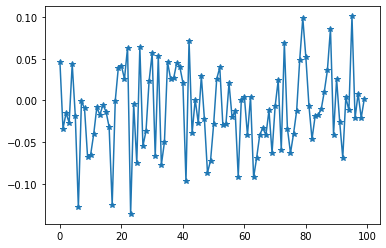

In [80]:
# create data:
N = 100
p = 20
cov_base = 0.5
repetition = 100

beta_hat = np.empty([repetition, p])

for i in range(repetition):
    X, y, beta = simulate_data(N, p, cov_base, mean)

    # OLS:
    X_cov_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat[i,:] = np.matmul(np.matmul(X_cov_inv, X.T),y)

    
fig, ax = plt.subplots()  # Create a figure containing a single axes.
beta_error = beta_hat - beta
ax.plot(np.mean(beta_error, axis = 1), marker = '*') 
